# Titanic  - The Logistic Regression Problem

### We will solve this using logistic regression method 
* **The data is availiable on Kaggle and it helds the competision for Data Science real time project**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import math
%matplotlib inline


## Step 1: Collecting Data

In [2]:
# Step 1 : Collecting data
titanic_data = pd.read_csv('train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("Number of Passengers in orignal data: " +str(len(titanic_data.index)))

Number of Passengers in orignal data: 891


## Step 2: Analysing Data
### Creating different plot to check relationship between variables


<AxesSubplot:xlabel='Survived', ylabel='count'>

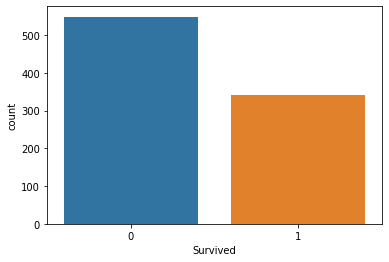

In [4]:
sns.countplot(x='Survived', data = titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

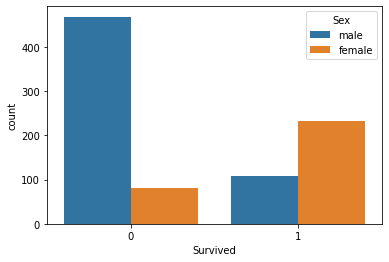

In [5]:
sns.countplot(x = "Survived", hue = "Sex", data = titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

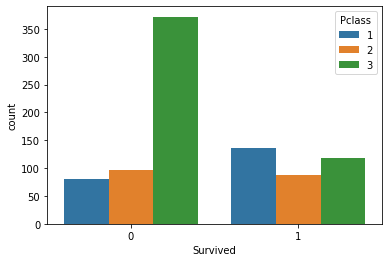

In [6]:
sns.countplot(x = "Survived", hue = "Pclass", data = titanic_data)

<AxesSubplot:ylabel='Frequency'>

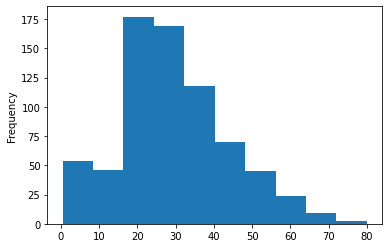

In [7]:
titanic_data["Age"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

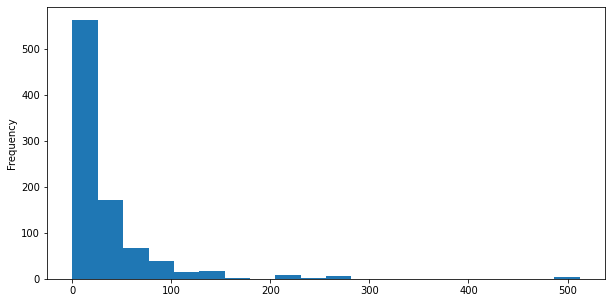

In [8]:
titanic_data["Fare"].plot.hist(bins=20, figsize = (10,5))

In [9]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

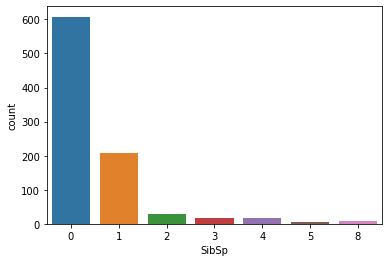

In [10]:
sns.countplot(x = 'SibSp', data = titanic_data)

<AxesSubplot:xlabel='Parch', ylabel='count'>

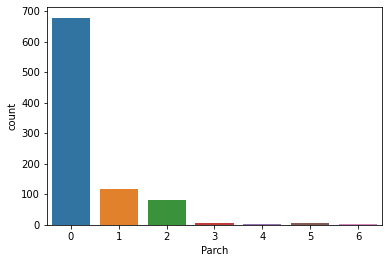

In [11]:
sns.countplot(x = 'Parch', data = titanic_data)

## Step 3: Data Wrangling (Data Cleaning)
#### Clean the data by removing the NaN (Null) values and unnecessary columns in the dataset

#### We use Imputation for data wrangling
**Imputation**: _this is the method of filling the values where NULL value is present or delete that perticular column._

In [12]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

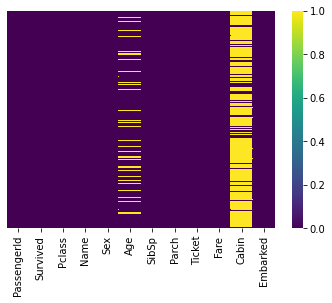

In [13]:
sns.heatmap(titanic_data.isnull(), yticklabels=False ,cmap = "viridis")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

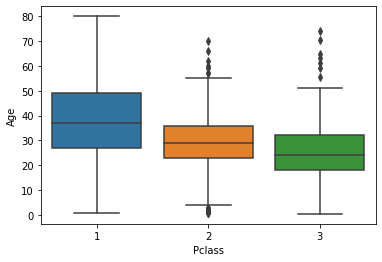

In [14]:
sns.boxplot(x = "Pclass", y = "Age", data =titanic_data)

In [15]:
# we are droping the Cabin column because it's not that much useful for our data analysis
# Cabin column have 678 Null values which are too large
titanic_data.drop("Cabin", axis = 1, inplace = True)

In [16]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
# Now we are droping all Null values which are present in titanic_data
titanic_data.dropna(inplace=True)

<AxesSubplot:>

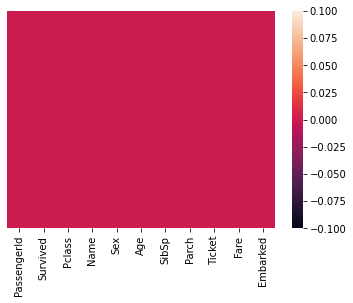

In [18]:
sns.heatmap(titanic_data.isnull(), yticklabels=False)

In [19]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [20]:
titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [21]:
# creating a dummie variable of sex column and deleting the female column
# now 1 is stands for Male and 0 is for Female
sex = pd.get_dummies(titanic_data['Sex'],drop_first=True)
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [22]:
# creating a dummie variable of Embarked column which shows 3 values that shows passanger from C = Chairborg, Q = Queenstown, S = Soutntam
# This three columns are carrying a boolean values
# Now we are droping C column if Q and S are both contain 0 value then passanger is Definatily from Chairborg

embark = pd.get_dummies(titanic_data["Embarked"],drop_first=True)
embark.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [23]:
# creating a dummie variable of Pclass column which shows 3 values that shows passanger from 1 = First Class, 2 = Second Class, 3 = Third Class.
# This three columns are carrying a boolean values
# Now we are droping 1 column if 2 and 3 are both contain 0 value then passanger is Definatily from First Class

Pcl = pd.get_dummies(titanic_data["Pclass"], drop_first=True)
Pcl.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [24]:
titanic_data = pd.concat([titanic_data,sex,embark,Pcl], axis = 1)

In [25]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [26]:
# Now we are droping irrelevent columens from dataset

titanic_data.drop(['Sex', 'Pclass','Embarked','PassengerId','Name','Ticket'], axis=1, inplace = True )

In [27]:
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


## Step 4: Train and Test Data

In [28]:
X = titanic_data.drop("Survived", axis = 1)
y = titanic_data["Survived"]

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=48)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
logmodel = LogisticRegression()

In [33]:
logmodel.fit(X_train, y_train)

c:\users\harshal\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [34]:
predictions = logmodel.predict(X_test)

## Step 5:  Accuracy check

In [35]:
from sklearn.metrics import classification_report

In [36]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.85      0.87      0.86       129\n           1       0.79      0.76      0.78        85\n\n    accuracy                           0.83       214\n   macro avg       0.82      0.82      0.82       214\nweighted avg       0.83      0.83      0.83       214\n'

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
confusion_matrix(y_test, predictions)

array([[112,  17],
       [ 20,  65]], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_test, predictions)

0.8271028037383178